# Importations

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import os
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score
from scipy.stats import zscore



# Loading Datasets

In [8]:
File_path=os.path.join(os.getcwd(),'..','Data','data.csv')
df=pd.read_csv(File_path)
df


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [11]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [12]:
df['Unnamed: 32'].unique()

array([nan])

In [13]:
df_New=df.drop(columns=['Unnamed: 32','id'])
df_New.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [14]:
df_New.duplicated().sum()

0

# Data Visualization

In [9]:
df_New.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


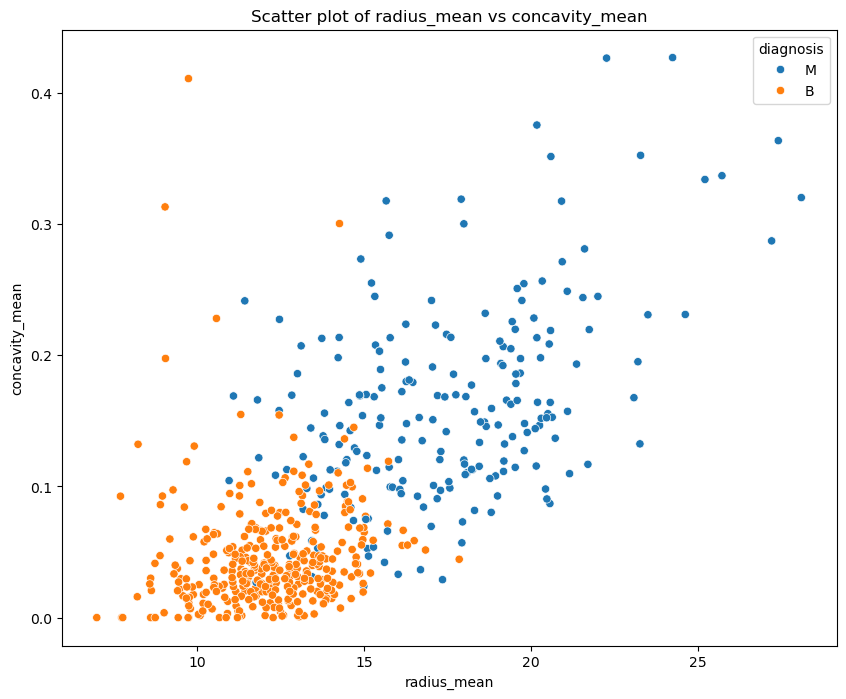

In [10]:
plt.figure(figsize=(10,8))
sns.scatterplot(df_New,x='radius_mean',y='concavity_mean',hue='diagnosis')
plt.title('Scatter plot of radius_mean vs concavity_mean')
plt.show()

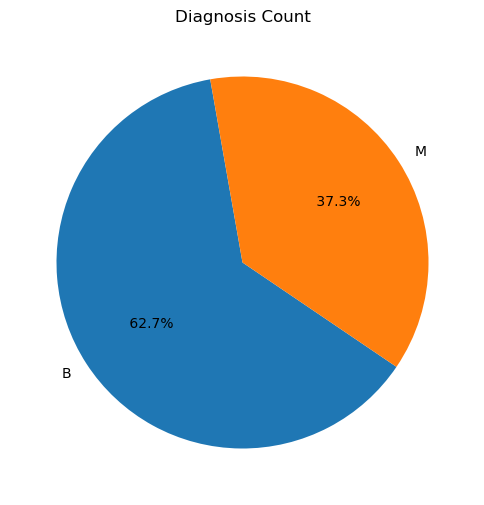

In [11]:
plt.figure(figsize=(6,7))
diagnosis_count=df_New['diagnosis'].value_counts()
plt.pie(diagnosis_count,labels=diagnosis_count.index,startangle=100,autopct='% 1.1f%%')
plt.title('Diagnosis Count')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

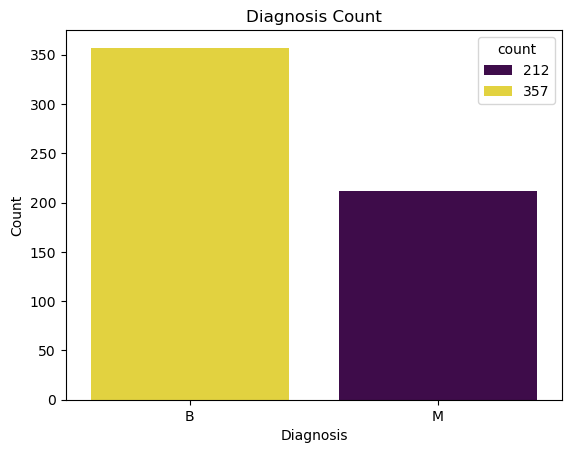

In [12]:
sns.barplot(x=diagnosis_count.index,y=diagnosis_count.values,palette='viridis',hue=diagnosis_count)
plt.title('Diagnosis Count')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show

In [15]:
df_New['diagnosis']=df_New['diagnosis'].map({'B':1,'M':0})

#  select the features with the highest correlation with the target variable

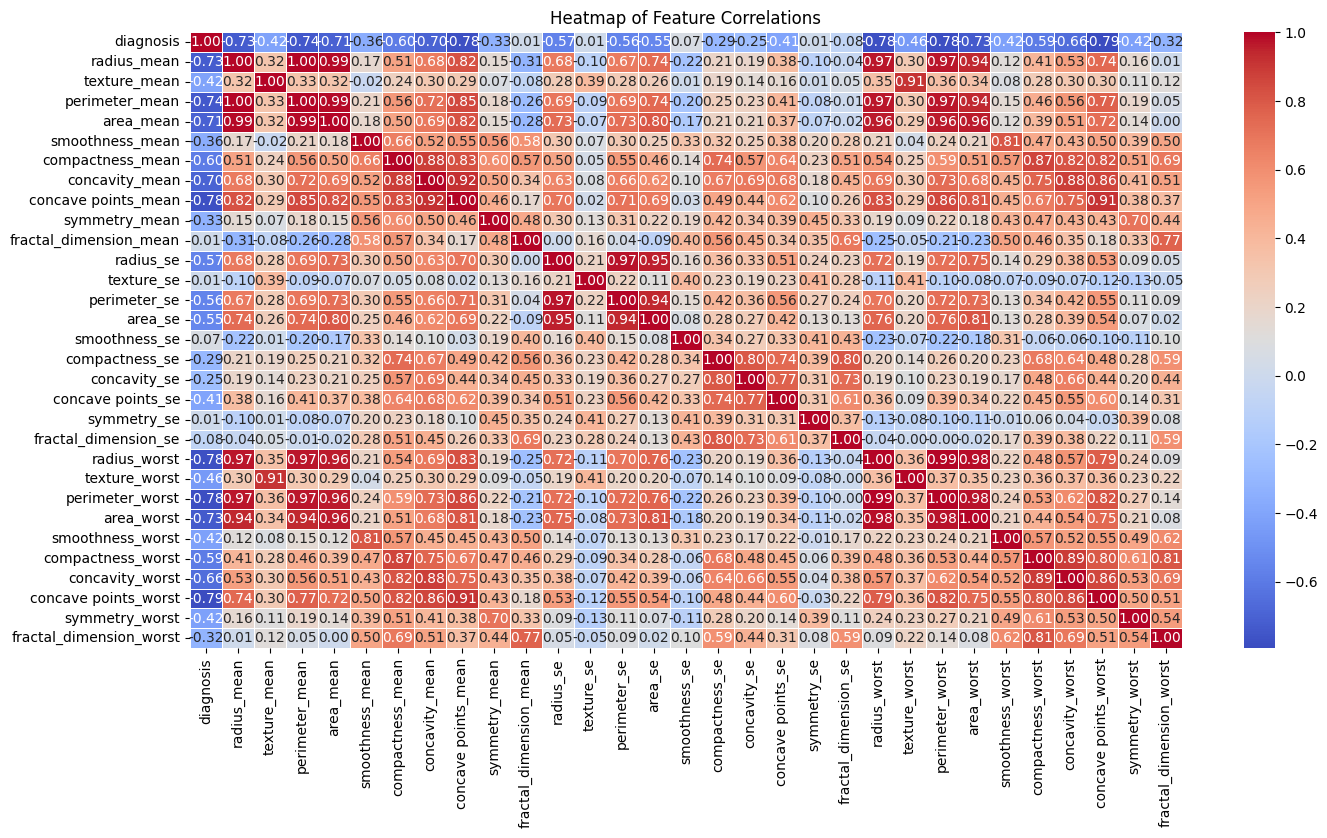

In [16]:
correlation_matrix = df_New.corr()

plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Heatmap of Feature Correlations')
plt.show()

In [17]:
target_corr=correlation_matrix['diagnosis']

sorrted_corr=target_corr.abs().sort_values(ascending=False)
print("Top Correlated Features with Diagnosis:")
print(sorrted_corr)

Top Correlated Features with Diagnosis:
diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se    

In [18]:
threshold = 0.5
selected_features = sorrted_corr[sorrted_corr > threshold].index.tolist()
selected_features.remove('diagnosis')
print("\nSelected Features (Correlation > 0.5):")
print(selected_features)



Selected Features (Correlation > 0.5):
['concave points_worst', 'perimeter_worst', 'concave points_mean', 'radius_worst', 'perimeter_mean', 'area_worst', 'radius_mean', 'area_mean', 'concavity_mean', 'concavity_worst', 'compactness_mean', 'compactness_worst', 'radius_se', 'perimeter_se', 'area_se']


# check for outliers in your dataset

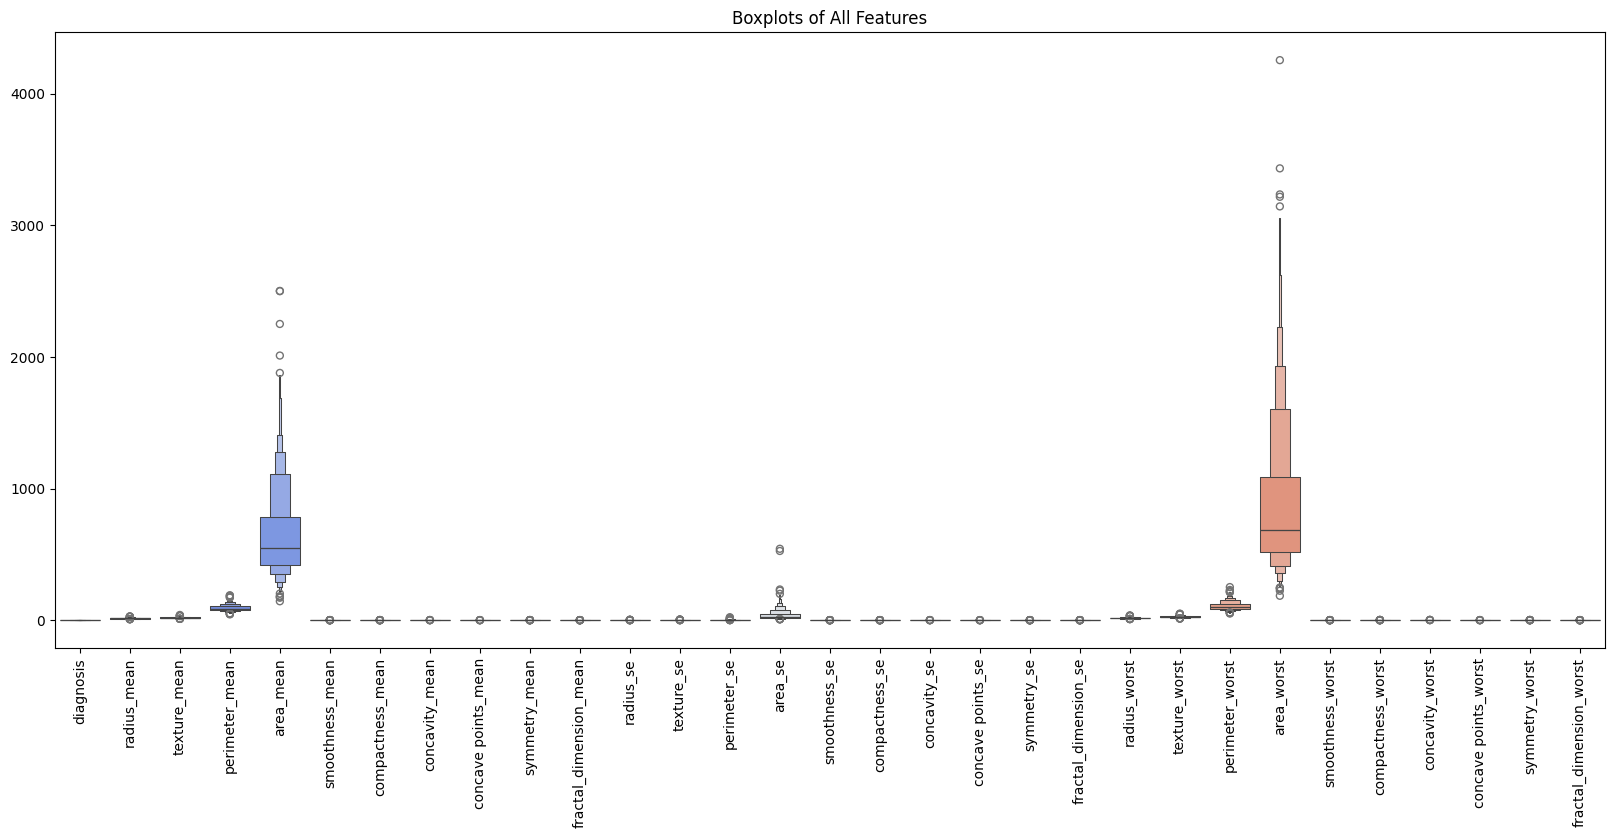

In [15]:
plt.figure(figsize=(20, 8))
sns.boxenplot(data=df_New,palette='coolwarm')
plt.title("Boxplots of All Features")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [19]:
Z_scores=df_New.select_dtypes(['float','int']).apply(zscore)

outliers=(Z_scores.abs()> 3 ).any(axis=1)

print(f"Number of outliers: {outliers.sum()}")
print("Indices of outliers:", df_New[outliers].index.tolist())

Number of outliers: 74
Indices of outliers: [0, 3, 9, 12, 14, 23, 25, 31, 35, 42, 60, 68, 71, 72, 78, 82, 83, 105, 108, 112, 116, 119, 122, 138, 146, 151, 152, 176, 180, 181, 190, 192, 202, 203, 212, 213, 219, 232, 236, 239, 258, 259, 265, 288, 290, 314, 318, 323, 339, 345, 351, 352, 368, 370, 376, 379, 388, 389, 400, 416, 417, 430, 461, 473, 503, 504, 505, 521, 557, 559, 561, 562, 567, 568]


In [20]:
Q1=df_New.quantile(0.25)
Q3=df_New.quantile(0.75)
IQR=Q3-Q1

outliers = ((df_New < (Q1 - 1.5 * IQR)) | (df_New > (Q3 + 1.5 * IQR))).any(axis=1)

print(f"Number of outliers: {outliers.sum()}")
print("Indices of outliers:", df_New[outliers].index.tolist())

Number of outliers: 171
Indices of outliers: [0, 1, 2, 3, 4, 5, 8, 9, 12, 14, 15, 18, 22, 23, 24, 25, 26, 27, 30, 31, 33, 34, 35, 38, 41, 42, 53, 56, 60, 62, 63, 68, 70, 71, 72, 76, 77, 78, 82, 83, 95, 105, 108, 110, 111, 112, 116, 118, 119, 121, 122, 136, 138, 145, 146, 147, 150, 151, 152, 156, 161, 162, 164, 168, 173, 176, 180, 181, 185, 190, 192, 196, 199, 202, 203, 210, 212, 213, 214, 218, 219, 229, 232, 236, 239, 242, 245, 250, 252, 254, 256, 257, 258, 259, 262, 265, 272, 273, 275, 288, 290, 300, 302, 314, 318, 323, 329, 332, 335, 337, 339, 343, 345, 351, 352, 366, 368, 369, 370, 372, 373, 376, 379, 388, 389, 391, 393, 400, 416, 417, 424, 430, 433, 443, 449, 450, 455, 460, 461, 465, 468, 469, 471, 473, 485, 489, 492, 498, 503, 504, 505, 507, 520, 521, 528, 533, 535, 537, 538, 539, 553, 556, 557, 559, 561, 562, 563, 564, 565, 567, 568]


C:\Users\kdkdn\AppData\Local\Temp\ipykernel_32200\3843392309.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(df,x='diagnosis',y='radius_worst',palette='viridis')
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 17.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


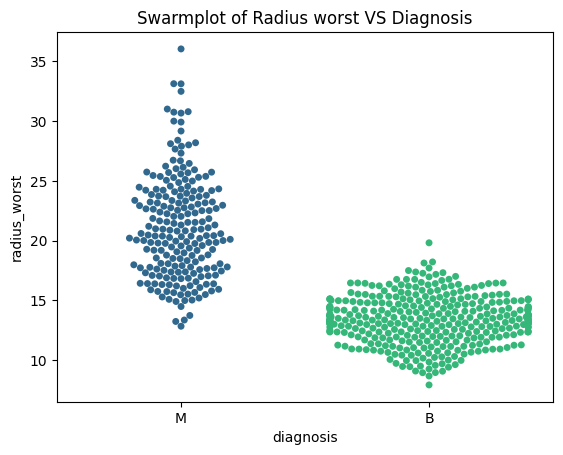

In [21]:
sns.swarmplot(df,x='diagnosis',y='radius_worst',palette='viridis')
plt.title('Swarmplot of Radius worst VS Diagnosis')
plt.show()

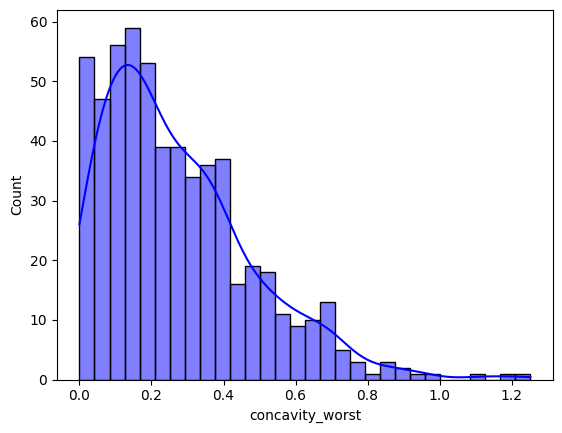

In [19]:
sns.histplot(df_New,x='concavity_worst',kde=True,bins=30,color='blue')
plt.show()

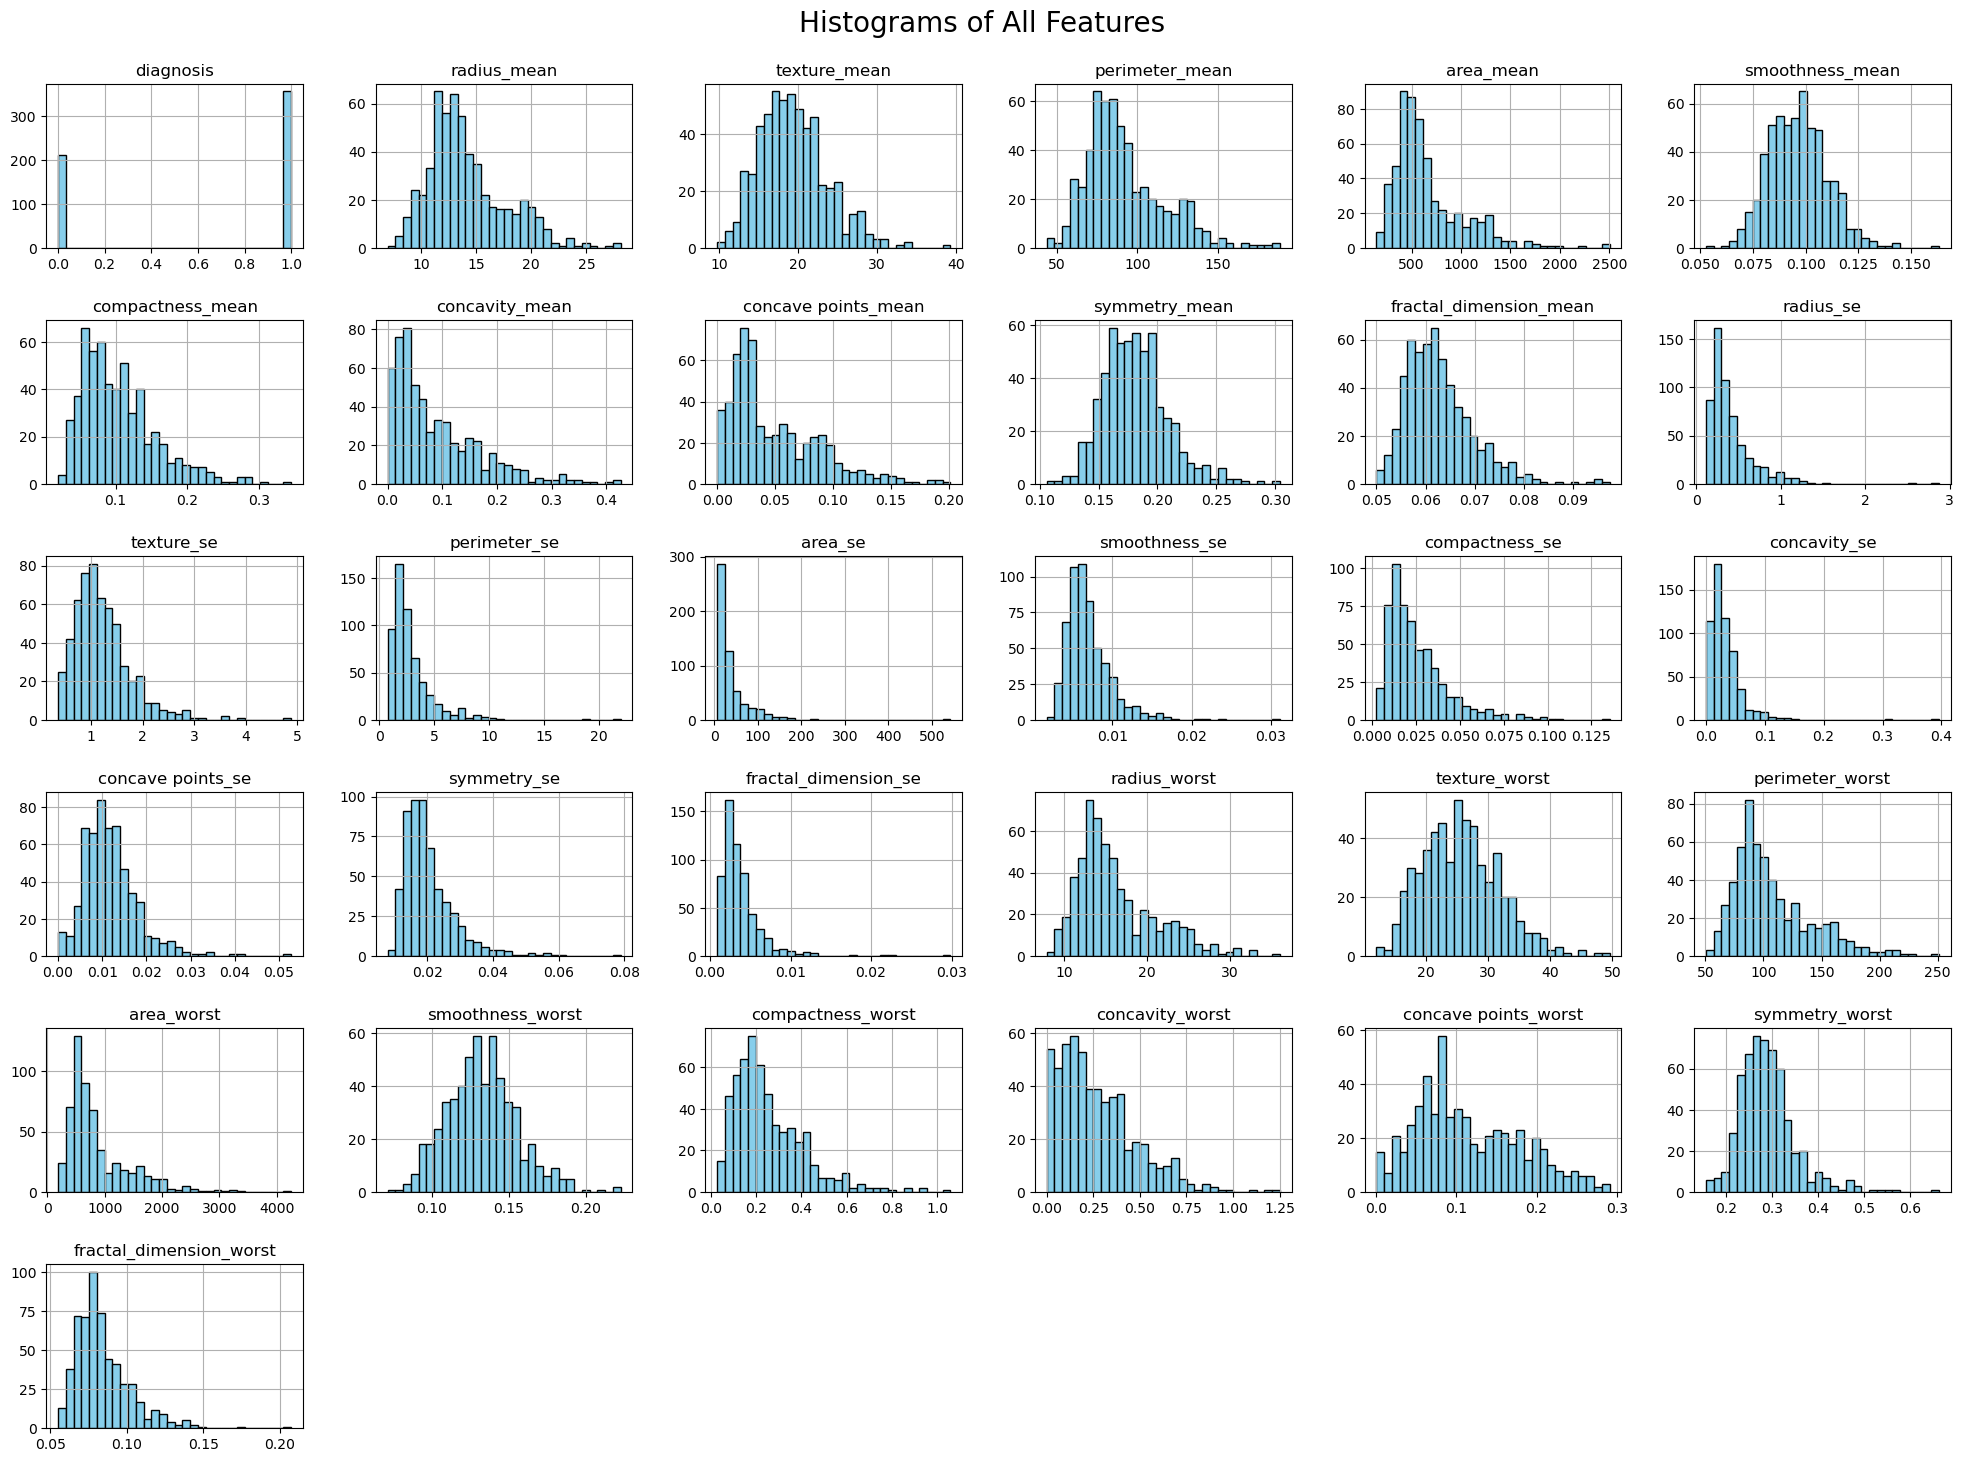

In [22]:
df_New.hist(figsize=(20, 15), bins=30, color='skyblue', edgecolor='black')

# Add a title for the entire plot
plt.suptitle('Histograms of All Features', fontsize=20)
plt.tight_layout(pad=2.0)  # Adjust spacing
plt.show()

# Feature Engineering

In [22]:
# Apply log transformation to highly skewed features
df_New['log_radius_mean'] = np.log1p(df_New['radius_mean'])
df_New['log_texture_mean'] = np.log1p(df_New['texture_mean'])


In [23]:
# Create interaction features between pairs of variables that might have combined effects on the target variable.
df_New['radius_texture_interaction'] = df_New['radius_mean'] * df_New['texture_mean']


In [24]:
target_corr=correlation_matrix['diagnosis']

sorrted_corr=target_corr.abs().sort_values(ascending=False)
print("Top Correlated Features with Diagnosis:")
print(sorrted_corr)

Top Correlated Features with Diagnosis:
diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se    

In [25]:
threshold = 0.5
selected_features = sorrted_corr[sorrted_corr > threshold].index.tolist()
selected_features.remove('diagnosis')
print("\nSelected Features (Correlation > 0.5):")
print(selected_features)


Selected Features (Correlation > 0.5):
['concave points_worst', 'perimeter_worst', 'concave points_mean', 'radius_worst', 'perimeter_mean', 'area_worst', 'radius_mean', 'area_mean', 'concavity_mean', 'concavity_worst', 'compactness_mean', 'compactness_worst', 'radius_se', 'perimeter_se', 'area_se']


# Feature Selection
- Use statistical tests to select the best features.

In [26]:
X=df_New.drop(columns='diagnosis')
y=df_New['diagnosis']


selector=SelectKBest(score_func=f_classif,k='all')
x_new=selector.fit_transform(X,y)

selected_features = X.columns[selector.get_support()]
print("Selected Features: ", selected_features)

Selected Features:  Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'log_radius_mean',
       'log_texture_mean', 'radius_texture_interaction'],
      dtype='object')


## Recursive Feature Elimination (RFE)
- Recursively remove features and build a model on the remaining features to select the most important ones.

In [27]:
model=RandomForestClassifier()
selector=RFE(model,n_features_to_select=10)
X_new=selector.fit_transform(X,y)

selected_features = X.columns[selector.support_]
print("Selected Features using RFE: ", selected_features)

Selected Features using RFE:  Index(['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean',
       'radius_worst', 'perimeter_worst', 'area_worst', 'concavity_worst',
       'concave points_worst', 'radius_texture_interaction'],
      dtype='object')


In [28]:
model = RandomForestClassifier()
model.fit(X, y)

feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importances: \n", feature_importances)

top_features = feature_importances.head(10).index.tolist()
print("Top 10 Selected Features: ", top_features)

Feature Importances: 
 area_worst                    0.126042
concave points_mean           0.120974
perimeter_worst               0.111925
concave points_worst          0.110798
radius_worst                  0.095734
perimeter_mean                0.059012
log_radius_mean               0.056258
concavity_worst               0.038013
area_mean                     0.032957
radius_texture_interaction    0.027503
area_se                       0.021171
concavity_mean                0.021090
radius_mean                   0.020732
compactness_worst             0.020408
smoothness_worst              0.016768
texture_worst                 0.015730
radius_se                     0.010958
texture_mean                  0.010560
symmetry_worst                0.009749
compactness_mean              0.008987
log_texture_mean              0.008479
concavity_se                  0.008427
perimeter_se                  0.007848
fractal_dimension_worst       0.007046
texture_se                    0.004419
sm

In [29]:
X_selected = X[top_features]
model = RandomForestClassifier()
model.fit(X_selected, y)

from sklearn.metrics import accuracy_score
y_pred = model.predict(X_selected)
print("Accuracy: ", accuracy_score(y, y_pred))

Accuracy:  1.0


# Spliting The data into training and testing sets

In [30]:
X=df_New[top_features]
y=df_New['diagnosis']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((455, 10), (114, 10), (455,), (114,))

In [31]:
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [3]:
scaler = StandardScaler()

In [32]:
from sklearn.preprocessing import StandardScaler
import joblib

# Fit scaler on training data
scaler = StandardScaler()
scaler.fit(X_train)

# Save the fitted scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

#  apply Logistic Regression 

accuracy_score:  0.9736842105263158
f1_score:  0.9790209790209791
classification_report:                precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



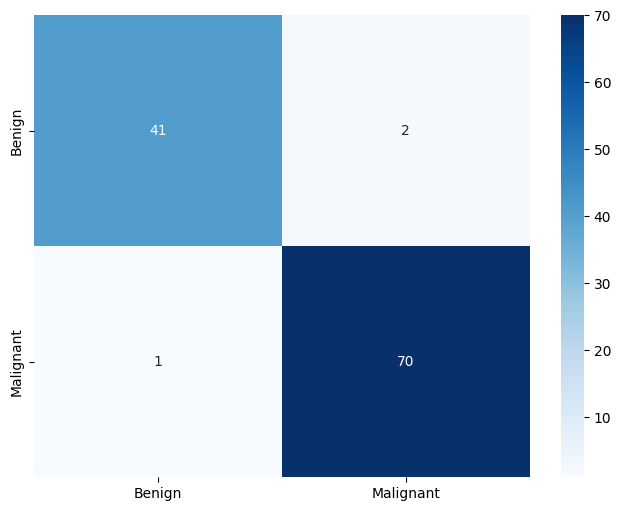

In [32]:
LR=LogisticRegression()
LR.fit(X_train_scaled,y_train)
y_pred=LR.predict(X_test_scaled)

accuracy=accuracy_score(y_test,y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
print('accuracy_score: ', accuracy)
print('f1_score: ', f1)
print('classification_report: ', class_report)

In [41]:
import joblib

# Save (dump) the model to a file
joblib.dump(LR, 'logistic_regression_model.pkl')


['logistic_regression_model.pkl']

# apply KNN_

accuracy_score:  0.9736842105263158
f1_score:  0.9787234042553191
classification_report:                precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.99      0.97      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



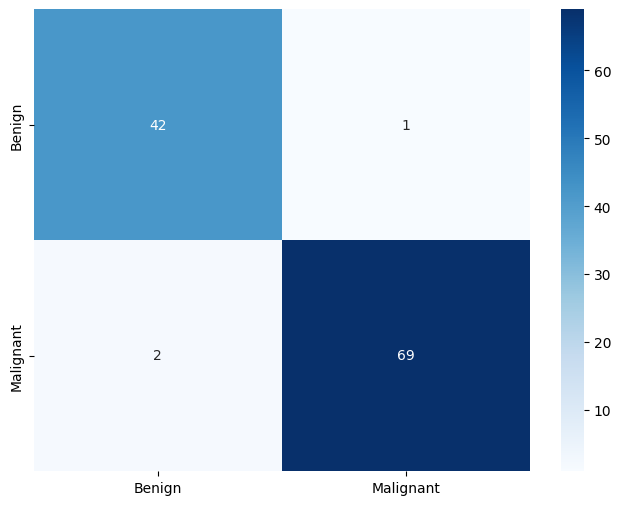

In [33]:
KNN=KNeighborsClassifier(n_neighbors=6)
KNN.fit(X_train_scaled, y_train)
y_pred_KNN=KNN.predict(X_test_scaled)

accuracy=accuracy_score(y_test,y_pred_KNN)
f1 = f1_score(y_test, y_pred_KNN)
conf_matrix = confusion_matrix(y_test, y_pred_KNN)
class_report = classification_report(y_test, y_pred_KNN)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
print('accuracy_score: ', accuracy)
print('f1_score: ', f1)
print('classification_report: ', class_report)

In [42]:
joblib.dump(KNN, 'KNN_model.pkl')


['KNN_model.pkl']

# apply SVM

accuracy_score:  0.9736842105263158
f1_score:  0.9793103448275862
classification_report:                precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



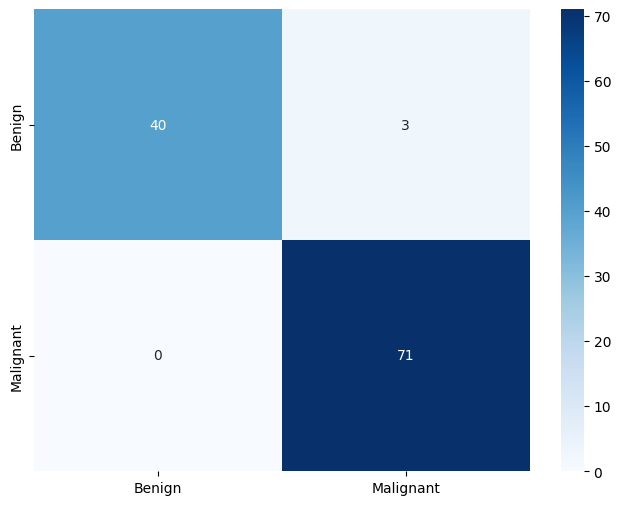

In [34]:
SVM=SVC(C=0.1,kernel='rbf',gamma=0.2)
SVM.fit(X_train_scaled,y_train)

y_pred_SVM=SVM.predict(X_test_scaled)

accuracy=accuracy_score(y_test,y_pred_SVM)
f1_SVM = f1_score(y_test, y_pred_SVM)
conf_matrix = confusion_matrix(y_test, y_pred_SVM)
class_report = classification_report(y_test, y_pred_SVM)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
print('accuracy_score: ', accuracy)
print('f1_score: ', f1_SVM)
print('classification_report: ', class_report)

In [43]:
joblib.dump(SVM, 'SVM_model.pkl')


['SVM_model.pkl']

# apply DT

accuracy_score:  0.9473684210526315
f1_score:  0.9583333333333334
classification_report:                precision    recall  f1-score   support

           0       0.95      0.91      0.93        43
           1       0.95      0.97      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



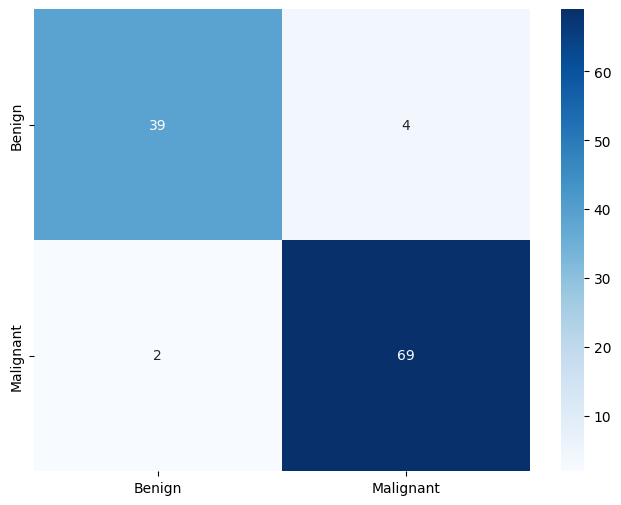

In [35]:
DT=DecisionTreeClassifier(max_depth=10)
DT.fit(X_train_scaled,y_train)


y_pred_DT=DT.predict(X_test_scaled)

accuracy_DT=accuracy_score(y_test,y_pred_DT)
f1_DT = f1_score(y_test, y_pred_DT)
conf_matrix = confusion_matrix(y_test, y_pred_DT)
class_report = classification_report(y_test, y_pred_DT)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
print('accuracy_score: ', accuracy_DT)
print('f1_score: ', f1_DT)
print('classification_report: ', class_report)

# apply RandomForestClassifier

accuracy_score:  0.956140350877193
f1_score:  0.965034965034965
classification_report:                precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



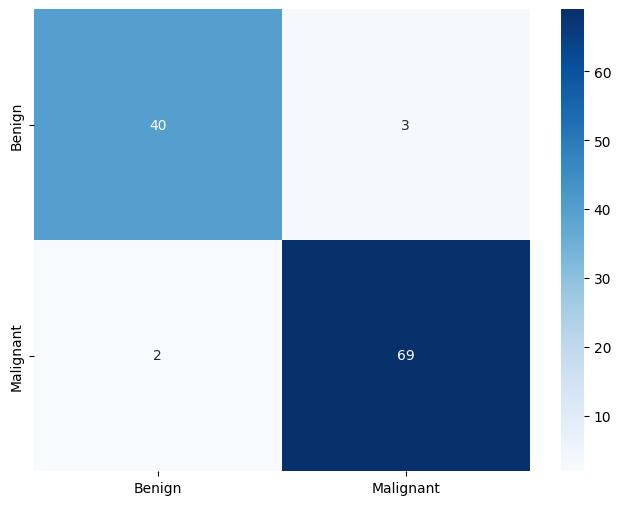

In [36]:
Random=RandomForestClassifier(n_estimators=30,max_depth=10,min_samples_split=2)
Random.fit(X_train_scaled,y_train)

y_pred_Random=Random.predict(X_test_scaled)

accuracy_Random=accuracy_score(y_test,y_pred_Random)
f1_Random = f1_score(y_test, y_pred_Random)
conf_matrix = confusion_matrix(y_test, y_pred_Random)
class_report = classification_report(y_test, y_pred_Random)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
print('accuracy_score: ', accuracy_Random)
print('f1_score: ', f1_Random)
print('classification_report: ', class_report)

In [44]:
joblib.dump(Random, 'Random_model.pkl')


['Random_model.pkl']

# apply VotingClassifier

accuracy_score:  0.956140350877193
f1_score:  0.965034965034965
classification_report:                precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



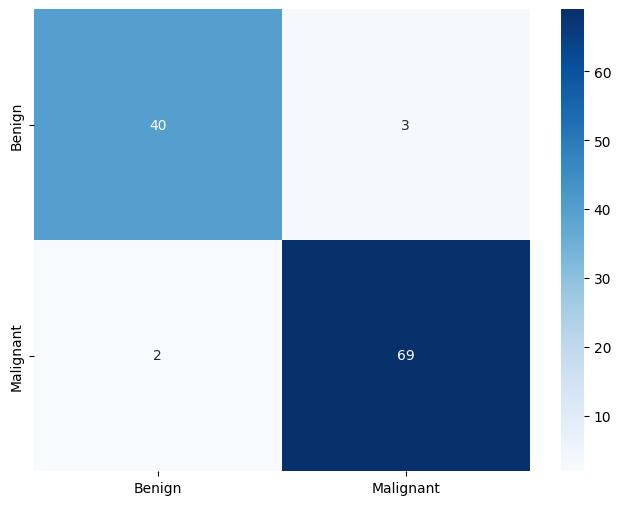

In [37]:
voting_clf = VotingClassifier(estimators=[
    ('rf1', Random),
    ('rf2', Random),
    ('rf3', Random)
], voting='hard')

voting_clf.fit(X_train_scaled,y_train)
y_pred_voting_clf=voting_clf.predict(X_test_scaled)

accuracy_Random=accuracy_score(y_test,y_pred_voting_clf)
f1_Random = f1_score(y_test, y_pred_voting_clf)
conf_matrix = confusion_matrix(y_test, y_pred_voting_clf)
class_report = classification_report(y_test, y_pred_voting_clf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
print('accuracy_score: ', accuracy_Random)
print('f1_score: ', f1_Random)
print('classification_report: ', class_report)

# BaggingClassifier

In [38]:
dt_classifier = DecisionTreeClassifier(random_state=42)

accuracy_score:  0.956140350877193
f1_score:  0.965034965034965
classification_report:                precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



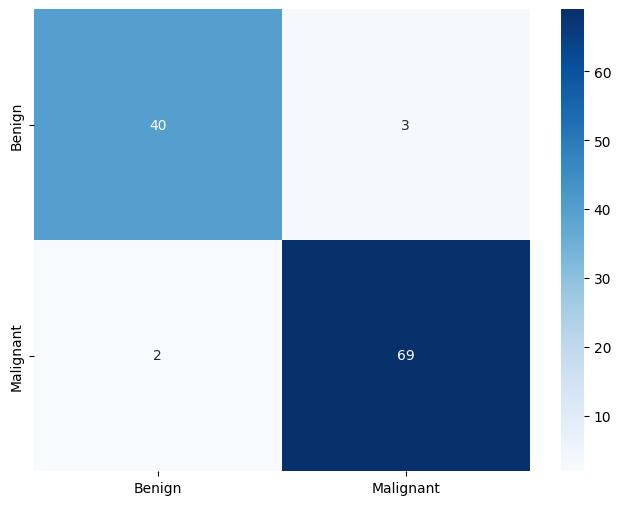

In [39]:
bagging_clf = BaggingClassifier(estimator=dt_classifier, n_estimators=50, random_state=42)

bagging_clf.fit(X_train_scaled,y_train)
y_pred_bagging_clf=bagging_clf.predict(X_test_scaled)

accuracy_Bagging=accuracy_score(y_test,y_pred_bagging_clf)
f1_Bagging = f1_score(y_test, y_pred_bagging_clf)
conf_matrix = confusion_matrix(y_test, y_pred_bagging_clf)
class_report = classification_report(y_test, y_pred_bagging_clf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
print('accuracy_score: ', accuracy_Bagging)
print('f1_score: ', f1_Bagging)
print('classification_report: ', class_report)


# AdaBoostClassifier

accuracy_score:  0.9473684210526315
f1_score:  0.958904109589041
classification_report:                precision    recall  f1-score   support

           0       0.97      0.88      0.93        43
           1       0.93      0.99      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



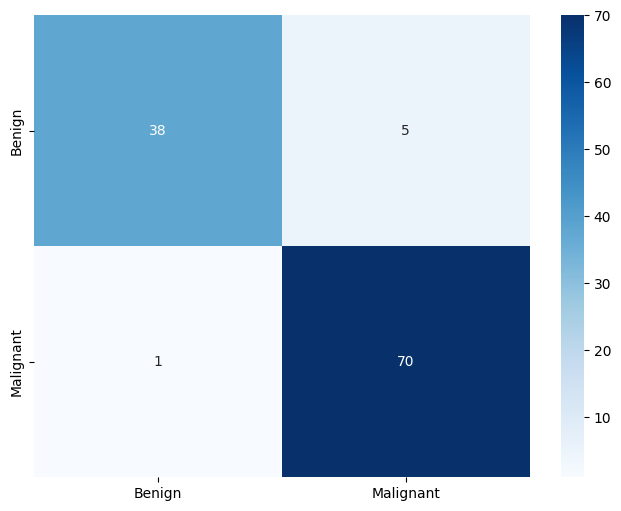

In [40]:
adaboost_clf = AdaBoostClassifier(estimator=dt_classifier, n_estimators=50, random_state=42)

adaboost_clf.fit(X_train_scaled,y_train)
y_pred_adaboost_clf=adaboost_clf.predict(X_test_scaled)

accuracy_adaboost=accuracy_score(y_test,y_pred_adaboost_clf)
f1_adaboost = f1_score(y_test, y_pred_adaboost_clf)
conf_matrix = confusion_matrix(y_test, y_pred_adaboost_clf)
class_report = classification_report(y_test, y_pred_adaboost_clf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
print('accuracy_score: ', accuracy_adaboost)
print('f1_score: ', f1_adaboost)
print('classification_report: ', class_report)